In [311]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import ast
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing, cluster)
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import pickle

In [278]:
dataframe = pd.read_csv("../Data/data.csv")

In [279]:
dataframe.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,InheritanceDepth,HttpClientCalls,UsingsNumber
count,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000
mean,4.059289,28.185771,797.958498,85.480237,14.371542,3.038194e+04,4920.847826,618.160079,326.466403,14.132411,181.025692,1.646245,2.242401e+03,902.695652
std,7.048941,137.026719,3265.645077,324.706912,60.224401,1.620877e+05,34944.817084,2028.716248,937.602696,33.621543,590.963604,1.031847,4.969869e+04,2579.989246
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-1.000000e+00,0.000000
25%,0.000000,0.000000,14.000000,1.000000,0.000000,1.132250e+03,33.250000,30.250000,29.250000,1.000000,13.000000,1.000000,0.000000e+00,91.750000
50%,1.000000,0.000000,52.000000,6.000000,0.000000,3.230500e+03,138.000000,77.500000,79.000000,5.000000,39.000000,1.000000,0.000000e+00,242.500000
75%,5.000000,4.000000,206.750000,26.750000,3.000000,1.194575e+04,1044.750000,264.250000,212.500000,11.750000,110.000000,2.000000,1.750000e+00,646.750000
max,66.000000,1518.000000,35665.000000,3762.000000,757.000000,2.969367e+06,723961.000000,26570.000000,11503.000000,288.000000,7907.000000,9.000000,1.117948e+06,31467.000000


In [280]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Project_ID               506 non-null    object
 1   EndOfLifeFramework       506 non-null    int64 
 2   ForFrequency             506 non-null    int64 
 3   IfFrequency              506 non-null    int64 
 4   ForEachFrequency         506 non-null    int64 
 5   WhileFrequency           506 non-null    int64 
 6   CodeLines                506 non-null    int64 
 7   CommentLines             506 non-null    int64 
 8   MethodNumber             506 non-null    int64 
 9   ClassNumber              506 non-null    int64 
 10  InterfaceNumber          506 non-null    int64 
 11  InheritanceDeclarations  506 non-null    int64 
 12  InheritanceDepth         506 non-null    int64 
 13  ExternalAPICalls         506 non-null    object
 14  HttpClientCalls          506 non-null    i

In [281]:
dataframe.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,InheritanceDepth,HttpClientCalls,UsingsNumber
count,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000
mean,4.059289,28.185771,797.958498,85.480237,14.371542,3.038194e+04,4920.847826,618.160079,326.466403,14.132411,181.025692,1.646245,2.242401e+03,902.695652
std,7.048941,137.026719,3265.645077,324.706912,60.224401,1.620877e+05,34944.817084,2028.716248,937.602696,33.621543,590.963604,1.031847,4.969869e+04,2579.989246
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-1.000000e+00,0.000000
25%,0.000000,0.000000,14.000000,1.000000,0.000000,1.132250e+03,33.250000,30.250000,29.250000,1.000000,13.000000,1.000000,0.000000e+00,91.750000
50%,1.000000,0.000000,52.000000,6.000000,0.000000,3.230500e+03,138.000000,77.500000,79.000000,5.000000,39.000000,1.000000,0.000000e+00,242.500000
75%,5.000000,4.000000,206.750000,26.750000,3.000000,1.194575e+04,1044.750000,264.250000,212.500000,11.750000,110.000000,2.000000,1.750000e+00,646.750000
max,66.000000,1518.000000,35665.000000,3762.000000,757.000000,2.969367e+06,723961.000000,26570.000000,11503.000000,288.000000,7907.000000,9.000000,1.117948e+06,31467.000000


# Data Exploration

In [282]:
dfcopy = dataframe.copy()

In [283]:
def global_boundaries(data):
    global_max = 0
    global_min = 9999

    for row in data:
        row_list = ast.literal_eval(row)
        row_number = [int(x) for x in row_list]
        row_max = np.max(row_number)
        row_min = np.min(row_number)
        if row_max > global_max:
            global_max = row_max
        if row_min < global_min:
            global_min = row_min

    return global_max, global_min

print(global_boundaries(dfcopy['ClassCouplingListing']))
print(global_boundaries(dfcopy['CodeDuplication']))

(6857, 0)
(100, 0)


In [284]:
# binning the values in CodeDuplication and ClassCouplingListing 
duplicationBoundaries = np.linspace(0, 50, 5)
duplicationBoundaries[-1] = np.inf
print(duplicationBoundaries)
class_coupling_listings = np.linspace(0, 300, 5)
class_coupling_listings[-1] = np.inf
class_coupling_listings_rounded = np.round(class_coupling_listings)
print(class_coupling_listings_rounded)

[ 0.  12.5 25.  37.5  inf]
[  0.  75. 150. 225.  inf]


For CodeDuplication and ClassCouplingListing, bins were made, the last bin contains all values between the previous and infinity such that all data is grouped 

In [285]:
def handle_column_data(column):
    return column.apply(lambda x: np.array([float(value) for value in x.strip('[]').split(',')]))


In [286]:
def boundaries_splitting(column, boundaries, column_name):
    for i in range(len(boundaries) - 1):
        bin_name = f'{column_name}_{boundaries[i]}_{boundaries[i + 1]}'
        dfcopy[bin_name] = column.apply(
            lambda x: sum(boundaries[i] <= value < boundaries[i + 1] for value in np.atleast_1d(x)))


In [287]:
x = handle_column_data(dfcopy['CodeDuplication'])
y = handle_column_data(dfcopy['ClassCouplingListing'])

boundaries_splitting(x, duplicationBoundaries, column_name='CodeDuplication')
boundaries_splitting(y, class_coupling_listings_rounded,
                     column_name='ClassCouplingListing')

In [288]:
dfcopy.head(10)

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,...,UsingsNumber,ClassCouplingListing,CodeDuplication_0.0_12.5,CodeDuplication_12.5_25.0,CodeDuplication_25.0_37.5,CodeDuplication_37.5_inf,ClassCouplingListing_0.0_75.0,ClassCouplingListing_75.0_150.0,ClassCouplingListing_150.0_225.0,ClassCouplingListing_225.0_inf
0,1c3ff27b-f3a2-4a3d-a1ed-08ab3b314d91,1,0,54,2,0,1622,188,48,42,...,104,"[0, 1, 8, 1, 34, 17, 4, 16, 6, 65, 2, 46, 6, 1...",271,113,29,13,22,0,0,0
1,c429ecce-c898-45d9-962a-44c3d6ddf0ef,0,89,10462,1279,47,279209,79805,4271,2105,...,8186,"[8, 2, 54, 6, 7, 7, 3, 13, 8, 9, 65, 13, 19, 1...",1250,1250,1250,3735,1687,59,14,11
2,b0c370ee-fbe8-4f95-a8eb-6fe3d188a752,1,0,70,10,0,2994,234,80,83,...,281,"[2, 58, 24, 5, 5, 1, 4, 7, 2, 2, 3, 16, 27, 3,...",1035,279,85,58,76,0,0,0
3,875f41f0-bdc5-4dc1-bced-f479a5370838,3,0,44,2,0,1127,26,44,22,...,111,"[9, 7, 0, 5, 9, 4, 6, 6, 5, 18, 23, 23, 2, 3, ...",217,30,4,9,22,0,0,0
4,b2fe1aee-78d2-4ed6-b40f-b3d251a8094f,0,43,1436,221,12,48445,15445,1436,617,...,1802,"[20, 17, 11, 113, 22, 12, 6, 20, 12, 7, 9, 15,...",1250,1199,664,495,521,5,1,0
5,cf2a4a89-2aea-4dea-adcb-f7ff69fbb0a0,1,0,54,2,0,1622,188,48,42,...,104,"[0, 1, 8, 1, 34, 17, 4, 16, 6, 65, 2, 46, 6, 1...",271,113,29,13,22,0,0,0
6,5735d47b-0a1d-49d6-868c-4c5b4b069fb9,1,0,8,0,0,544,127,23,21,...,64,"[3, 25, 47, 11, 21, 10, 5, 2, 3, 5, 10, 10, 5,...",215,70,11,13,14,0,0,0
7,18c5e275-150f-4af0-9632-4b6ea4b75d61,1,0,1,0,0,420,5,22,14,...,67,"[3, 15, 5, 3, 5, 5, 7, 14, 14, 0, 0, 0, 6, 1]",255,121,26,66,14,0,0,0
8,3951c070-27ea-42ee-8492-f79fafc7c615,0,92,4444,496,131,79406,24703,2034,1332,...,254,"[25, 3, 1, 8, 5, 5, 14, 4, 17, 119, 48, 39, 10...",1250,1238,979,1058,718,13,2,3
9,414fef2f-5665-4dc5-8ec2-aa3a209b9afa,0,0,39,6,0,3248,49,63,85,...,108,"[6, 13, 9, 14, 11, 10, 0, 5, 9, 2, 6, 3, 4, 6,...",894,173,43,56,78,0,0,0


For ExternalAPICalls json data for each row was extracted into simple lists

In [289]:
def extract_numbers_from_json(json_string):
    try:
        data = json.loads(json_string.replace("'", "\""))
        numbers = [value for value in data.values() if isinstance(value, int)]
        return numbers
    
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []

In [290]:
dfcopy['ExternalAPIExtracted'] = dfcopy['ExternalAPICalls'].apply(extract_numbers_from_json)
dfcopy

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,...,ClassCouplingListing,CodeDuplication_0.0_12.5,CodeDuplication_12.5_25.0,CodeDuplication_25.0_37.5,CodeDuplication_37.5_inf,ClassCouplingListing_0.0_75.0,ClassCouplingListing_75.0_150.0,ClassCouplingListing_150.0_225.0,ClassCouplingListing_225.0_inf,ExternalAPIExtracted
0,1c3ff27b-f3a2-4a3d-a1ed-08ab3b314d91,1,0,54,2,0,1622,188,48,42,...,"[0, 1, 8, 1, 34, 17, 4, 16, 6, 65, 2, 46, 6, 1...",271,113,29,13,22,0,0,0,[]
1,c429ecce-c898-45d9-962a-44c3d6ddf0ef,0,89,10462,1279,47,279209,79805,4271,2105,...,"[8, 2, 54, 6, 7, 7, 3, 13, 8, 9, 65, 13, 19, 1...",1250,1250,1250,3735,1687,59,14,11,"[84, 0, 0, 2, 0, 1, 3, 1, 0, 3, 3, 1, 2, 0, 0,..."
2,b0c370ee-fbe8-4f95-a8eb-6fe3d188a752,1,0,70,10,0,2994,234,80,83,...,"[2, 58, 24, 5, 5, 1, 4, 7, 2, 2, 3, 16, 27, 3,...",1035,279,85,58,76,0,0,0,"[1, 32, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 5,..."
3,875f41f0-bdc5-4dc1-bced-f479a5370838,3,0,44,2,0,1127,26,44,22,...,"[9, 7, 0, 5, 9, 4, 6, 6, 5, 18, 23, 23, 2, 3, ...",217,30,4,9,22,0,0,0,"[0, 0, 0]"
4,b2fe1aee-78d2-4ed6-b40f-b3d251a8094f,0,43,1436,221,12,48445,15445,1436,617,...,"[20, 17, 11, 113, 22, 12, 6, 20, 12, 7, 9, 15,...",1250,1199,664,495,521,5,1,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,ba043096-86a7-44c5-801c-60fb3a2b0159,2,1,27,1,2,572,35,27,11,...,"[0, 14, 1, 5, 5, 1, 27, 6, 21]",108,22,10,12,9,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
502,eaa71640-d423-4d1e-b1ff-455363da8412,10,94,1453,108,53,36605,2406,1536,705,...,"[5, 1, 9, 11, 3, 4, 2, 15, 10, 4, 2, 5, 4, 2, ...",1250,1250,1210,2414,608,5,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ..."
503,9a5cc07b-97d2-4dd6-9fef-41f893ad85ac,0,0,7,0,0,449,72,18,10,...,"[0, 19, 6, 1, 4, 9, 3, 2, 25, 25]",111,24,20,4,10,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0]"
504,96544485-8840-4d30-aae2-aef1e7763f57,0,0,85,5,1,2502,312,68,70,...,"[0, 3, 6, 8, 6, 6, 6, 6, 6, 3, 7, 9, 2, 2, 4, ...",944,160,49,74,56,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [291]:
def global_boundaries_for_list(data):
    global_max = 0
    global_min = 9999

    for row in data:
        if len(row) != 0:
            row_max = np.max(row)
            row_min = np.min(row)
            if row_max > global_max:
                global_max = row_max
            if row_min < global_min:
                global_min = row_min

    return global_max, global_min

In [292]:
val1, val2 = global_boundaries_for_list(dfcopy['ExternalAPIExtracted'])
print(f'{val1} {val2}')

7336 0


In [293]:
external_api_extracted_boundaries = np.linspace(0, 500, 5)
external_api_extracted_boundaries[-1] = np.inf
boundaries_splitting(dfcopy['ExternalAPIExtracted'], external_api_extracted_boundaries, 'ExternalAPIExtracted')

In [294]:
dfcopy

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,...,CodeDuplication_37.5_inf,ClassCouplingListing_0.0_75.0,ClassCouplingListing_75.0_150.0,ClassCouplingListing_150.0_225.0,ClassCouplingListing_225.0_inf,ExternalAPIExtracted,ExternalAPIExtracted_0.0_125.0,ExternalAPIExtracted_125.0_250.0,ExternalAPIExtracted_250.0_375.0,ExternalAPIExtracted_375.0_inf
0,1c3ff27b-f3a2-4a3d-a1ed-08ab3b314d91,1,0,54,2,0,1622,188,48,42,...,13,22,0,0,0,[],0,0,0,0
1,c429ecce-c898-45d9-962a-44c3d6ddf0ef,0,89,10462,1279,47,279209,79805,4271,2105,...,3735,1687,59,14,11,"[84, 0, 0, 2, 0, 1, 3, 1, 0, 3, 3, 1, 2, 0, 0,...",51,1,0,0
2,b0c370ee-fbe8-4f95-a8eb-6fe3d188a752,1,0,70,10,0,2994,234,80,83,...,58,76,0,0,0,"[1, 32, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 5,...",23,0,0,0
3,875f41f0-bdc5-4dc1-bced-f479a5370838,3,0,44,2,0,1127,26,44,22,...,9,22,0,0,0,"[0, 0, 0]",3,0,0,0
4,b2fe1aee-78d2-4ed6-b40f-b3d251a8094f,0,43,1436,221,12,48445,15445,1436,617,...,495,521,5,1,0,[],0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,ba043096-86a7-44c5-801c-60fb3a2b0159,2,1,27,1,2,572,35,27,11,...,12,9,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",209,0,0,0
502,eaa71640-d423-4d1e-b1ff-455363da8412,10,94,1453,108,53,36605,2406,1536,705,...,2414,608,5,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...",206,1,2,0
503,9a5cc07b-97d2-4dd6-9fef-41f893ad85ac,0,0,7,0,0,449,72,18,10,...,4,10,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0]",16,0,0,0
504,96544485-8840-4d30-aae2-aef1e7763f57,0,0,85,5,1,2502,312,68,70,...,74,56,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",16,0,0,0


In [295]:
dfcopy.drop(columns=['Project_ID','ClassCouplingListing', 'CodeDuplication', 'ExternalAPICalls', 'ExternalAPIExtracted'], axis=1,inplace=True)
dfcopy


,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,...,CodeDuplication_25.0_37.5,CodeDuplication_37.5_inf,ClassCouplingListing_0.0_75.0,ClassCouplingListing_75.0_150.0,ClassCouplingListing_150.0_225.0,ClassCouplingListing_225.0_inf,ExternalAPIExtracted_0.0_125.0,ExternalAPIExtracted_125.0_250.0,ExternalAPIExtracted_250.0_375.0,ExternalAPIExtracted_375.0_inf
0,1,0,54,2,0,1622,188,48,42,1,...,29,13,22,0,0,0,0,0,0,0
1,0,89,10462,1279,47,279209,79805,4271,2105,38,...,1250,3735,1687,59,14,11,51,1,0,0
2,1,0,70,10,0,2994,234,80,83,4,...,85,58,76,0,0,0,23,0,0,0
3,3,0,44,2,0,1127,26,44,22,1,...,4,9,22,0,0,0,3,0,0,0
4,0,43,1436,221,12,48445,15445,1436,617,93,...,664,495,521,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2,1,27,1,2,572,35,27,11,0,...,10,12,9,0,0,0,209,0,0,0
502,10,94,1453,108,53,36605,2406,1536,705,23,...,1210,2414,608,5,1,0,206,1,2,0
503,0,0,7,0,0,449,72,18,10,0,...,20,4,10,0,0,0,16,0,0,0
504,0,0,85,5,1,2502,312,68,70,10,...,49,74,56,0,0,0,16,0,0,0


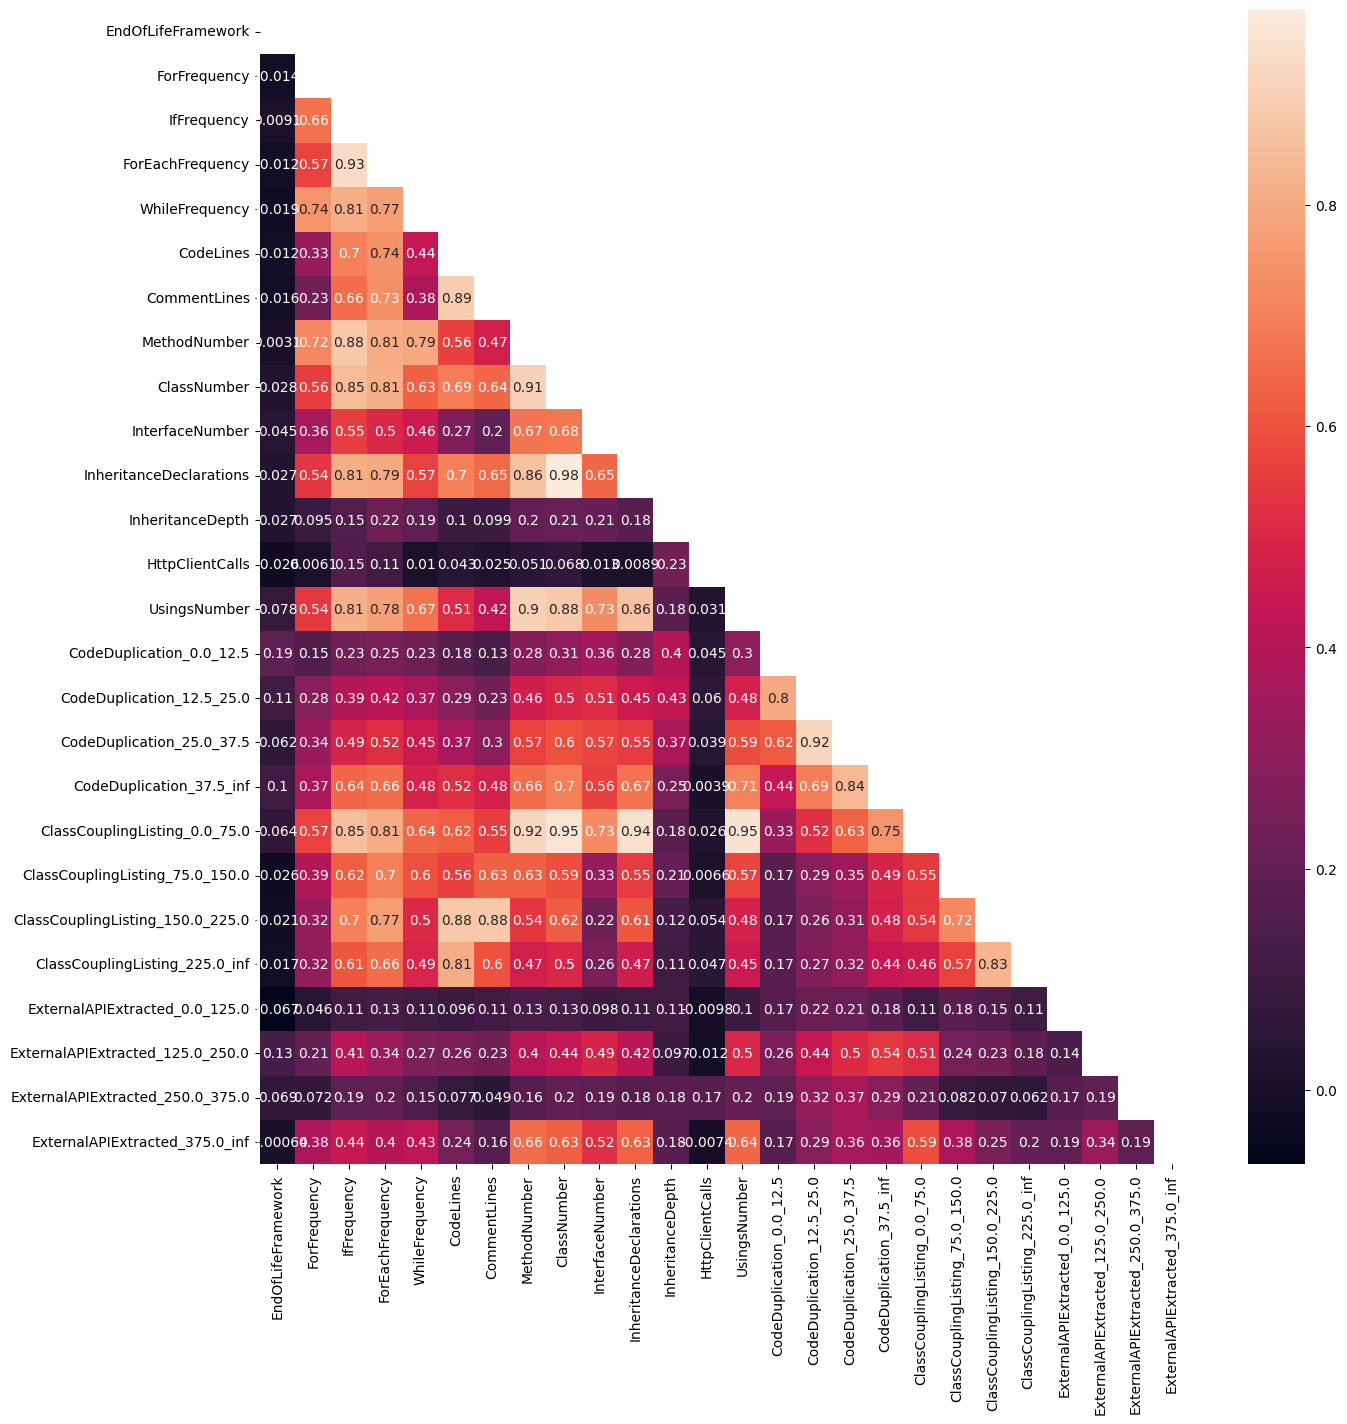

In [305]:
corr_m = dfcopy.corr()

mask = np.triu(corr_m)

plt.figure(figsize=(15,15))

sns.heatmap(corr_m, annot=True, mask=mask)
plt.show()

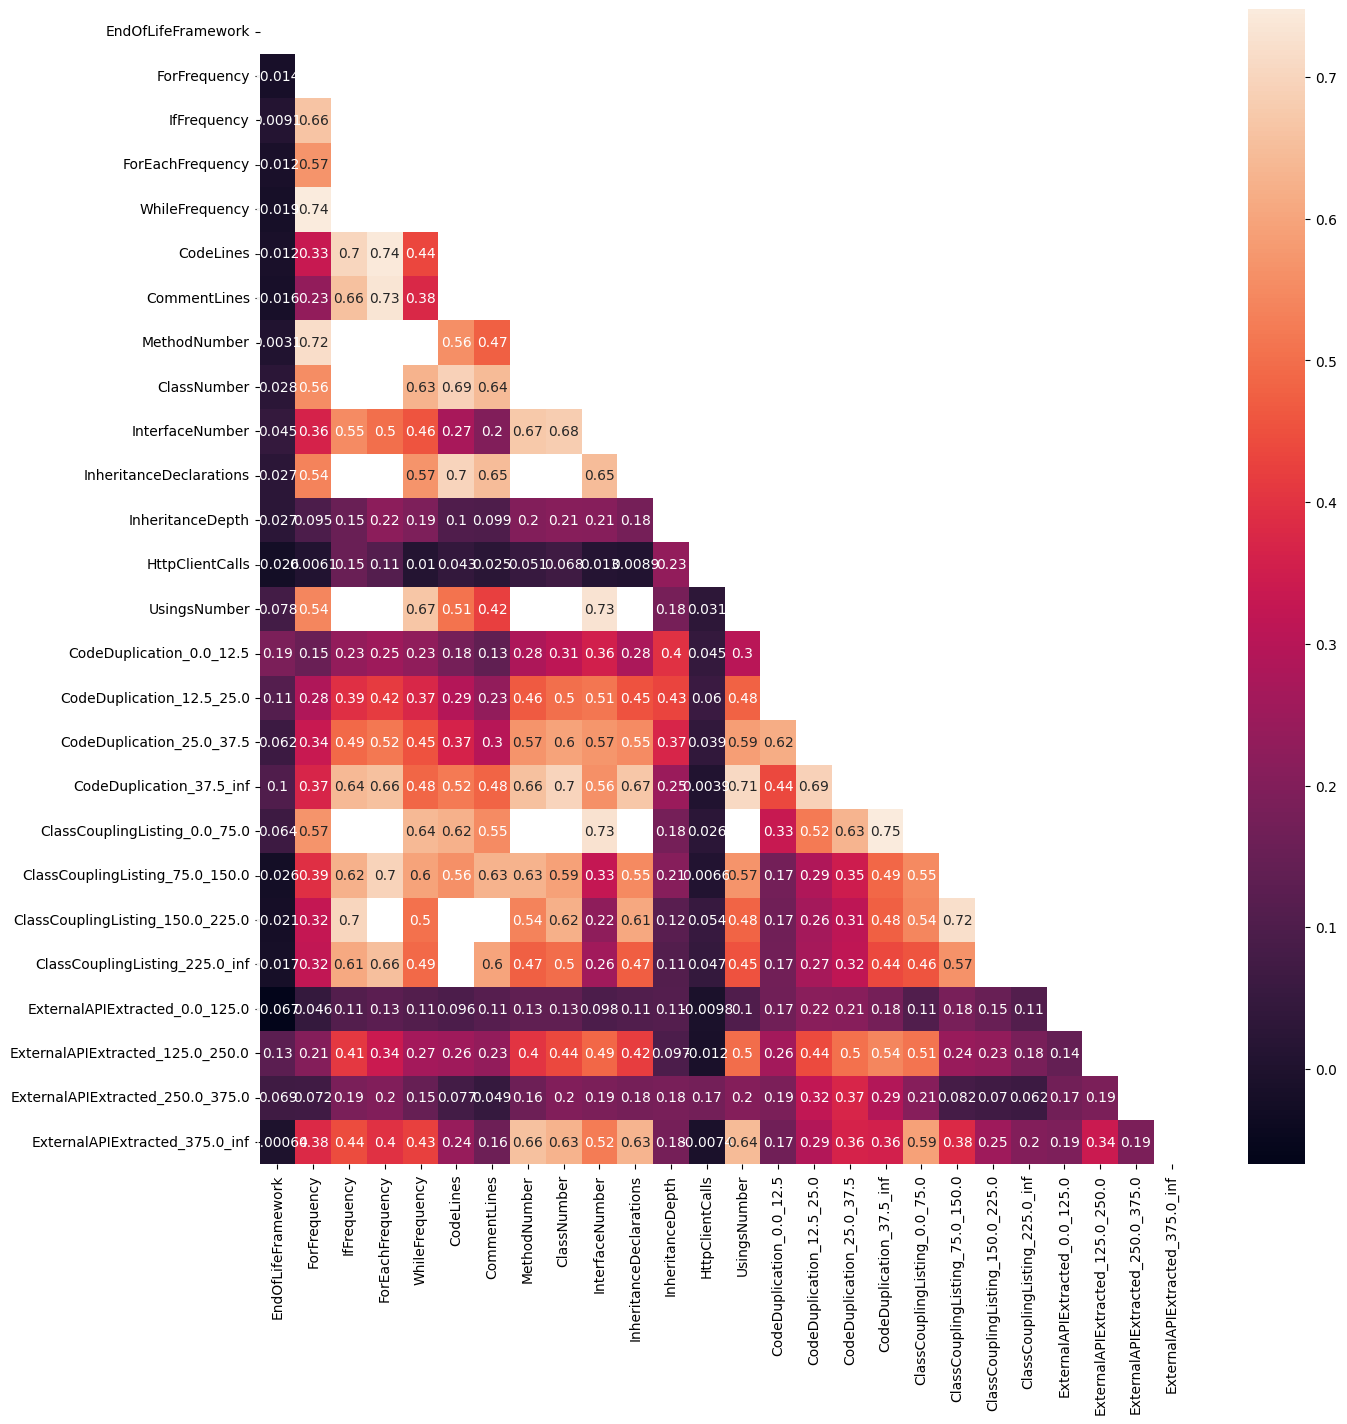

In [309]:
# Remove high correlation from sns
corr = (corr_m[(corr_m < 0.75)].dropna(thresh=2).dropna(thresh=2, axis=1))
mask = np.triu(corr)

plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, mask=mask)
plt.show()

# PCA


In [313]:
X = dfcopy.dropna()

X_s = preprocessing.StandardScaler().fit_transform(X)
pcas = decomposition.PCA(n_components=2)
ress = pcas.fit_transform(X_s)
print(pcas.explained_variance_ratio_)
print('sum:', np.sum(pcas.explained_variance_ratio_))

[0.46771245 0.10623544]
sum: 0.5739478913042653


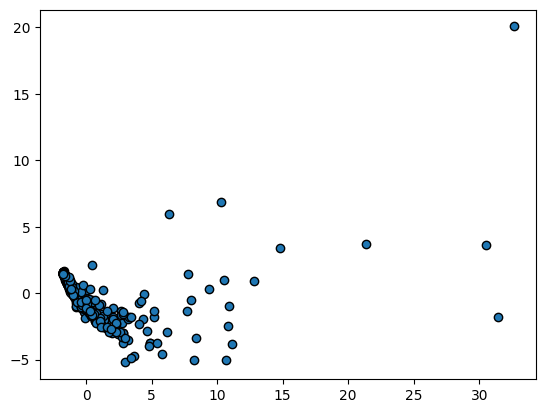

In [314]:
scatter = plt.scatter(ress[:, 0], ress[:, 1],edgecolors='black')
plt.show()

K Means

c:\Users\tomut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tomut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tomut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tomut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

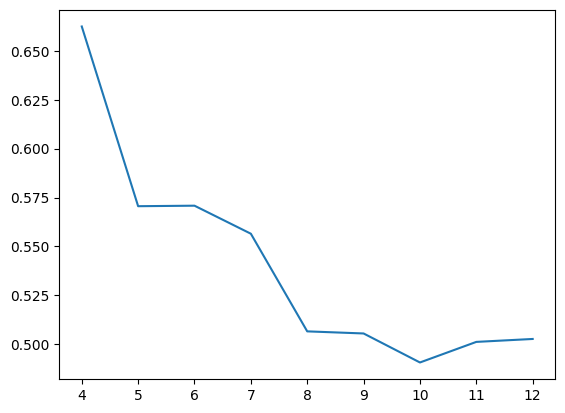

In [317]:
from sklearn.metrics import silhouette_score
silhouette = []

n_clusters = range(4,13)
for n in n_clusters:
    k_mean = cluster.KMeans(n_clusters=n, random_state=88)
    k_mean_clus = k_mean.fit_predict(ress)
    silhouette.append(silhouette_score(ress, k_mean.labels_))

print('')
plt.plot(n_clusters, silhouette)
plt.show()

## It can be seen that the elbow lies at 8

c:\Users\tomut\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


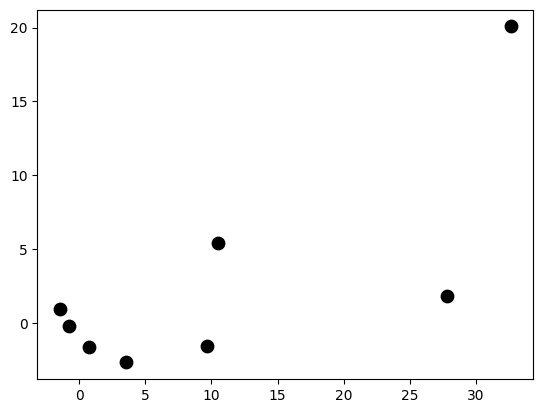

In [316]:
#Initialize the class object
kmeans = KMeans(n_clusters=8)
newpca = pcas.fit_transform(X_s)
means = kmeans.fit_predict(newpca)

centroids = kmeans.cluster_centers_
 
#plotting the results:
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.show()

# DBSCAN

In [318]:
pcadbscan = decomposition.PCA(n_components=2)
scaler = preprocessing.StandardScaler()

scaled_data = scaler.fit_transform(dfcopy)
pcadbscan.fit(scaled_data)
ressdbscan = pcadbscan.fit_transform(scaled_data)

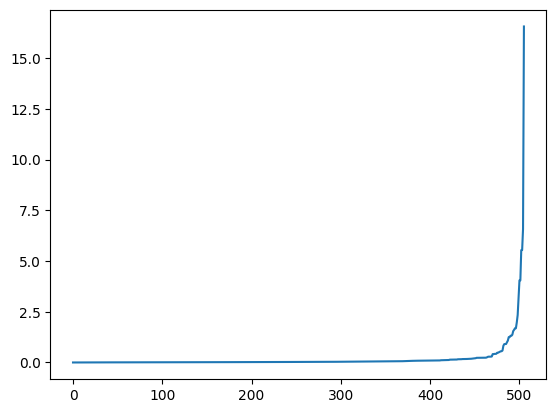

In [319]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(ressdbscan)
distances, indices = neighbors_fit.kneighbors(ressdbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [324]:
from numpy import unique
dbscan=DBSCAN(eps = 2, min_samples = 4)
yhat = dbscan.fit_predict(ressdbscan)
clusters = unique(yhat)
len(clusters)

3

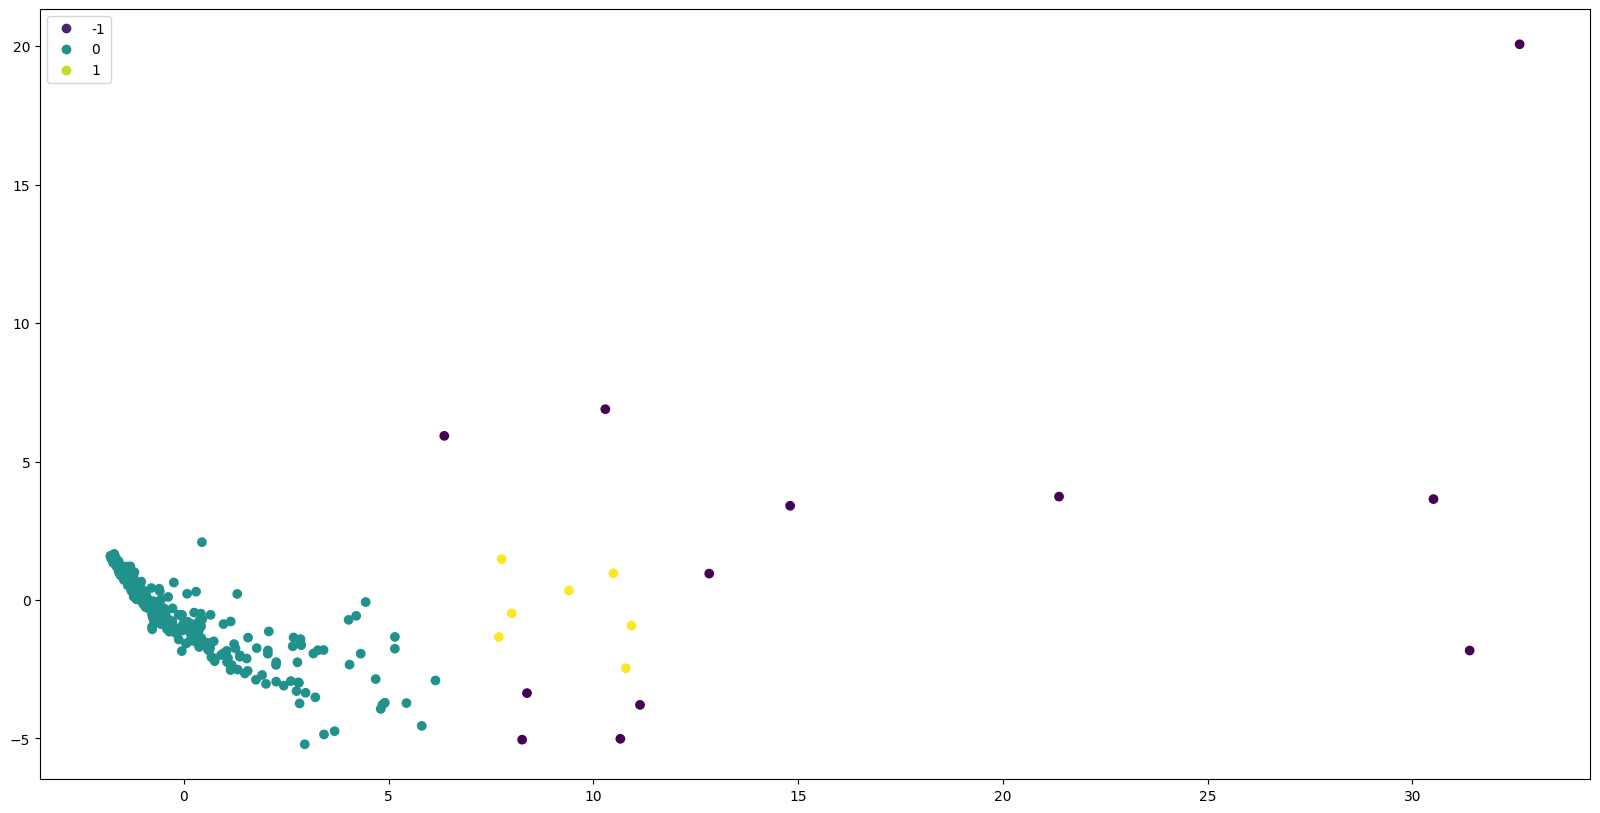

In [325]:
plt.figure(figsize=(20, 10))
scatter = plt.scatter(ressdbscan[:,0], ressdbscan[:,1] , c=yhat)
plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))
plt.show()

This saves the trained model into a pickle file that can then be loaded into the main system and used

In [ ]:
model = 0
model_pkl_file = "technical_debt_model.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)